# AgCl with Br and I speciation plot

In [2]:
% setup environment
% set path to equilibrium solver
txt=pwd;
n=length(txt);
rootpath=txt; rootpath=txt(1:n-19);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB'];
addpath(JEQUILIBpath);
% clear data and number format
clear; format short e
% turn off warnings
warning off
%graphics_toolkit('notebook'); % does not work
graphics_toolkit("plotly"); % works for XOctave
%graphics_toolkit("gnuplot");% does not work for XOctave. good for Octave
%available_graphics_toolkits()
%loaded_graphics_toolkits()


In [3]:
%equilibrium problem
AgT=0.01; BrT=0.01; IT=0.01; pH=7;  pe=20.75-pH; logClT=-9:0.02:-1; ClT=10.^logClT;

In [4]:
% MODEL USING PHREEQC

for i=1:length(ClT)

minerals=[{'AgCls'};{'AgBrs'};{'AgIs'}]; totalvector=[AgT; ClT(i); BrT; IT; ClT(i)+BrT+IT]; totalnames=[{'Ag'};{'Cl'}; {'Br'}; {'I'}; {'Na'}]; 
speciesexport=[{'Ag+'};{'Cl-'};{'Br-'};{'I-'};{'AgCl'};{'AgCl2-'};{'AgCl3-2'};{'AgCl4-3'};{'AgBr'};{'AgBr2-'};{'AgBr3-2'};{'AgBr4-3'};{'AgI'};{'AgI2-'};{'AgI3-2'};{'AgI4-3'}];
acid=['NaOH']; show=0; T=25;
database=['complexAgClBrI.dat']; 


tic;
[solutionspeciesconcs, speciesnames, solidconcs, solidnames]=runPHREEQCv2noHA(T,pH,pe,totalnames,totalvector,minerals,speciesexport,database,show,acid);
PHREEQCtime=toc;

Ag(i)=solutionspeciesconcs(1); 
Cl(i)=solutionspeciesconcs(2);
Br(i)=solutionspeciesconcs(3);
I(i)=solutionspeciesconcs(4);
AgCl(i)=solutionspeciesconcs(5); 
AgCl2(i)=solutionspeciesconcs(6);
AgCl3(i)=solutionspeciesconcs(7);
AgCl4(i)=solutionspeciesconcs(8);
AgBr(i)=solutionspeciesconcs(9);
AgBr2(i)=solutionspeciesconcs(10);
AgBr3(i)=solutionspeciesconcs(11);
AgBr4(i)=solutionspeciesconcs(12);
AgI(i)=solutionspeciesconcs(13);
AgI2(i)=solutionspeciesconcs(14);
AgI3(i)=solutionspeciesconcs(15);
AgI4(i)=solutionspeciesconcs(16);
AgCls(i)=solidconcs(1);
AgBrs(i)=solidconcs(2);
AgIs(i)=solidconcs(3);

end

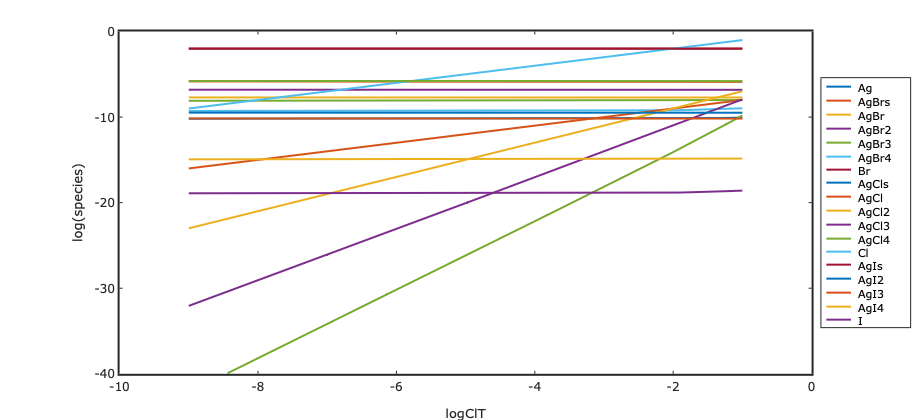

In [25]:
%plot -s 600,600 -f 'svg'
%graph
h=plot(logClT,log10(Ag),logClT,log10(AgBrs),logClT,log10(AgBr),logClT,log10(AgBr2),logClT,log10(AgBr3),logClT,log10(AgBr4),logClT,log10(Br),logClT,log10(AgCls),logClT,log10(AgCl),logClT,log10(AgCl2),logClT,log10(AgCl3),logClT,log10(AgCl4),logClT,log10(Cl),logClT,log10(AgIs),logClT,log10(AgI),logClT,log10(AgI2),logClT,log10(AgI3),logClT,log10(AgI4),logClT,log10(I));
set(h,'linewidth',2)
set(gca,'linewidth',2,'fontsize',12)
xlabel('logClT'); ylabel('log(species)')
legend('Ag','AgBrs','AgBr','AgBr2','AgBr3','AgBr4','Br','AgCls','AgCl','AgCl2','AgCl3','AgCl4','Cl','AgIs','AgI2','AgI3','AgI4','I','location','eastoutside')

%exportforplot=[...
%logAgT' log10(Ag)' log10(AgBrs)' log10(AgBr)' log10(AgBr2)' log10(AgBr3)' log10(AgBr4)' log10(AgCls)' log10(AgCl)' log10(AgCl2)' log10(AgCl3)' log10(AgCl4)' log10(AgIs)' log10(AgI)' log10(AgI2)' log10(AgI3)' log10(AgI4)'
%]